In [1]:
import superradiance as sr
import numpy as np
import bilby
import math

import astropy.constants as consts
import astropy.units as units

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib import colors as mplcolors

import scipy 
from scipy import interpolate

from scipy.optimize import fsolve

from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import gaussian_kde

from scipy.stats import beta


import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = 'CMU Serif'
# mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
# mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 7,7

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24


fontsize=30
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Generating data

In [ ]:
# Set an axion mass and a merger timescale
AXION_MASS_EV = 1.0e-12
AXION_GEOMETRIC_MASS = AXION_MASS_EV * sr.EV_TO_GEOMETRIC
MERGER_TIMESCALE = (10 * units.Gyr).to(units.s).value

# Create array of BH spins according to a uniform distribution
N_black_holes = 10000
BH_initial_spins = np.random.uniform(0, 1, N_black_holes)

# Create array of BH masses according to a power-law distribution
# Values come from Orion's code
BH_uniform = np.random.uniform(0, 1, N_black_holes)
MIN_BH_MASS = 5.0 * sr.M_SOL_TO_GEOMETRIC
MAX_BH_MASS = 50.0 * sr.M_SOL_TO_GEOMETRIC
EXPONENT = -1.35
BH_masses = ( (MAX_BH_MASS**EXPONENT - MIN_BH_MASS**EXPONENT)*BH_uniform + MIN_BH_MASS**EXPONENT) ** (1.0/EXPONENT)

# Generate spins based on 
final_BH_spins = np.array([sr.final_BH_spin(AXION_GEOMETRIC_MASS, BH_masses[i], BH_initial_spins[i], MERGER_TIMESCALE) for i in range(N_black_holes)])

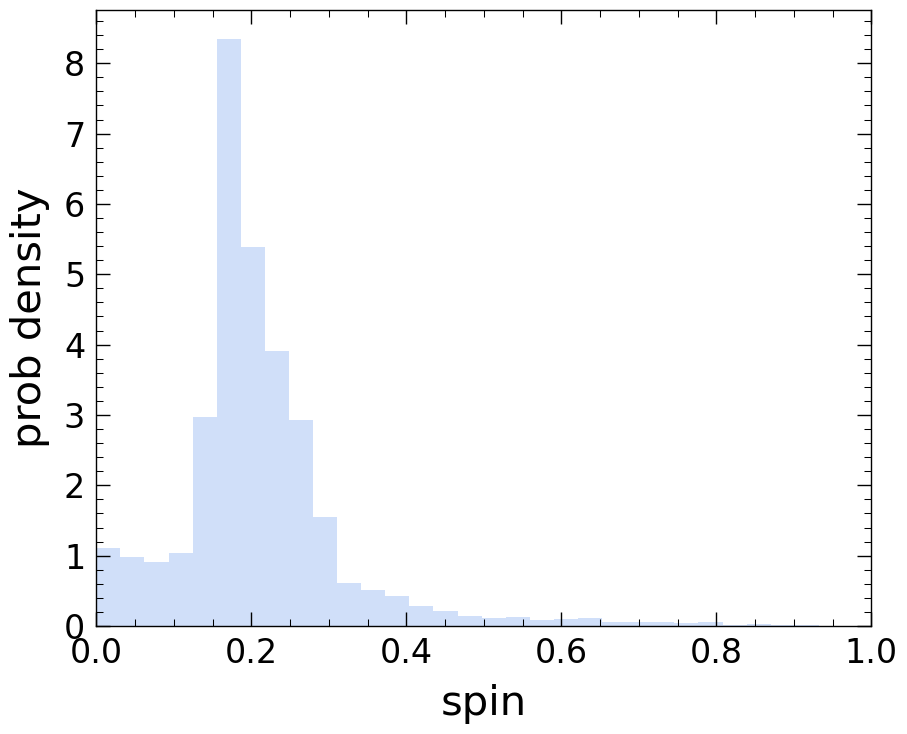

In [ ]:
# Plot
plt.figure(figsize=(10,8))

plt.hist(final_BH_spins, bins=30, density=True, alpha=0.3)
plt.xlim((0, 1))
plt.xlabel('spin')
plt.ylabel('prob density')

#plt.legend()
plt.show()